# 비지도 학습

In [1]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 비지도 학습의 종류

비지도 변환: 차원 축소, 주성분 분석 등  
클러스터링

# 비지도 학습의 도전과제

평가가 힘들다  
&nbsp; 이유: 레이블이 없는 경우가 많기 때문에 모델이 잘 하고 있는지 알기 힘듦

### 비지도 학습의 활용

데이터 탐색: 데이터의 생김새 등을 파악하고자 할 때 (특히 시각화)  
데이터 전처리: 비지도 학습을 통해 데이터를 새롭게 표현 (스케일링)

# 전처리, 스케일링

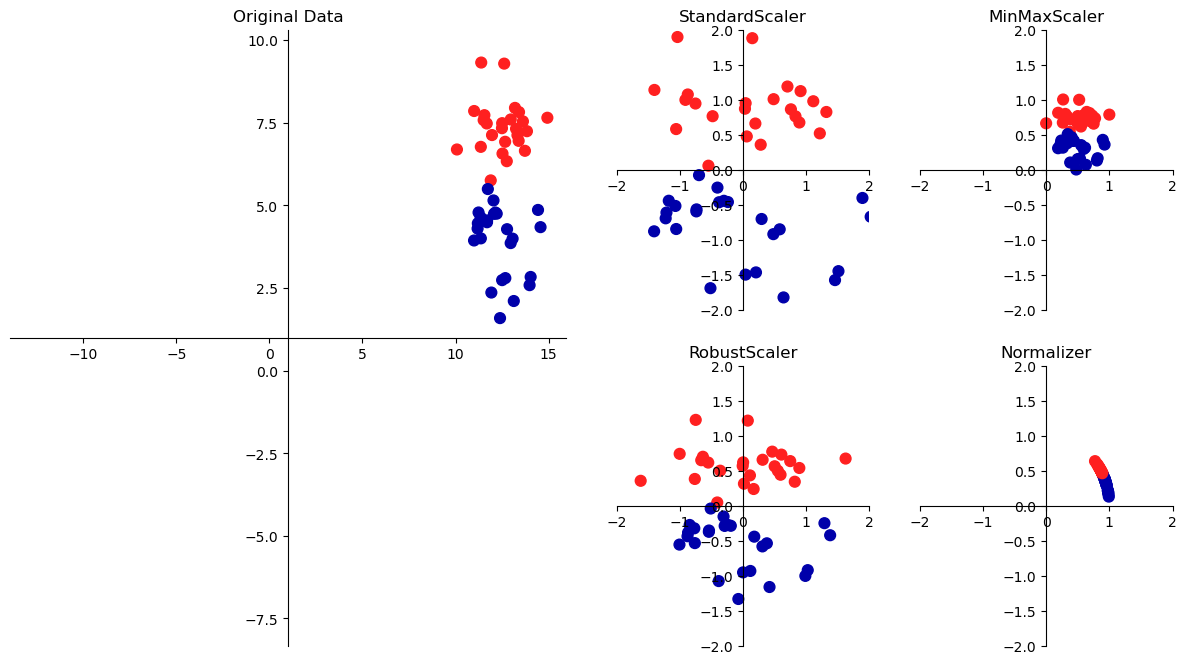

In [2]:
mglearn.plots.plot_scaling()

### 스케일링 방법

1. StandardScaler: 데이터를 표준정규분포에 맞춰 정규화  
2. RobustScaler: 데이터의 중간값, 사분위에 따라 변형 >>> 이상치에 덜 민감하게 반응  
3. MinMaxScaler: 최대값을 1, 최소값을 0으로 한 뒤, 데이터를 이 사이에 맞춰 변형  
4. Normalizer: 데이터의 유클리디안 거리가 1이 되도록 조정 >>> 각 데이터는 방향으로만 구분 가능

In [3]:
"""
    스케일링 예시
"""

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

X_train.shape, X_test.shape

((426, 30), (143, 30))

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [10]:
X_train_scaled = scaler.transform(X_train)

print(X_train_scaled.shape)
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

(426, 30)
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


#### 스케일링 시 주의사항

반드시 데이터 분할 전의, 원본 데이터로 스케일링할 것  
&nbsp; 만약 분할 후, 훈련셋에만 맞춰 스케일러를 만들면?
- 스케일러는 훈련셋의 최대, 최소값만 알고 있는 상태
- 이 스케일러를 테스트셋에 적용하면 테스트셋은 훈련셋의 값들을 기준으로 스케일링됨
- 이 경우, 제대로 스케일링되지 않을 수 있음  
&nbsp;>>> MinMaxScaler를 예로 들면, 훈련셋의 최대값보다 크거나 최소값보다 작은 값이 있을 수 있으므로 음수나 1보다 큰 값이 나올 수도 있다

In [15]:
print(scaler.transform(X_test).min(axis=0))
print(scaler.transform(X_test).max(axis=0))

[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


#### QuantileTransformer: ~ RobustScaling

데이터를 n_samples에 걸쳐 균등하게 분포시키고, 0 ~ 1 사이로 압축

In [25]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

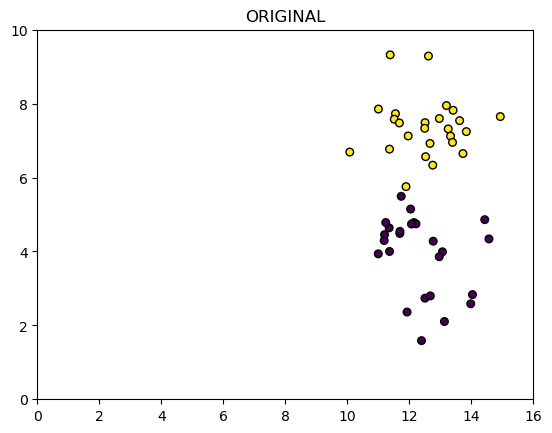

In [26]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[ : , 0], X[ : , 1], c=y, s=30, edgecolors='k')
plt.axis([0, 16, 0, 10])
plt.title("ORIGINAL")

plt.show()

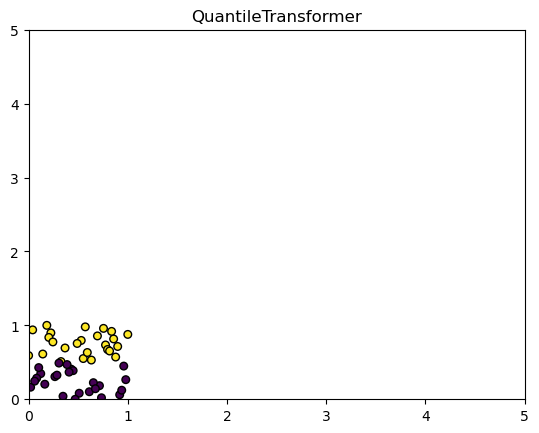

In [27]:
scaler = QuantileTransformer(n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[ : , 0], X_trans[ : , 1], c=y, s=30, edgecolors='k')
plt.axis([0, 5, 0, 5])
plt.title(type(scaler).__name__)

plt.show()

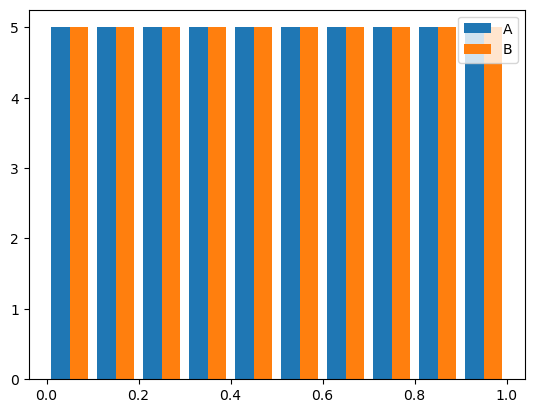

In [30]:
plt.hist(X_trans)

plt.legend(['A', 'B'])

plt.show()

In [34]:
"""
    QuantileTransformer의 n_samples 기본값은 1000 (여기선 50으로 해서 50)
    quantiles_ 속성으로 확인 가능
    밑의 shape에서 2는 특성 종류 >>> 2차원
"""

scaler.quantiles_.shape

(50, 2)

In [39]:
"""
    np.percentile(data, pct)
    data에서주어진 pct 분위의 경계값에 해당하는 값을 반환
    
    ex. np.cercentile(x, [10, 20, 30]) >>> x의 하위 10, 20, 30%의 경계값 반환
"""

x = np.array([[0], [5], [8], [9], [10]])

np.percentile(x[ : , 0], [0, 25, 50, 75, 100])

array([ 0.,  5.,  8.,  9., 10.])

In [40]:
x_trans = QuantileTransformer(n_quantiles=5).fit_transform(x)

np.percentile(x_trans[ : , 0], [0, 25, 50, 75, 100])

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

QuantileTransformer에서 output_distribution="normal"로 지정할 경우 균등분포가 아닌 정규분포로 변환

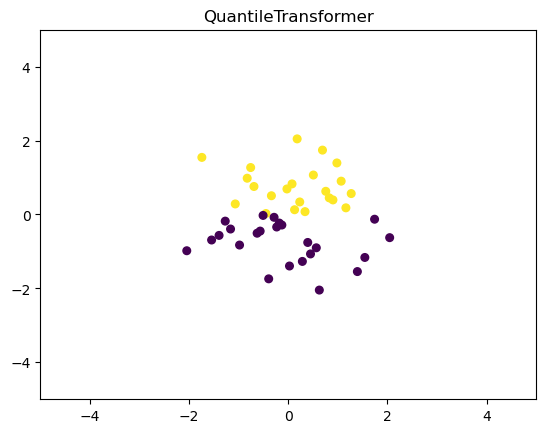

In [42]:
scaler = QuantileTransformer(output_distribution="normal", n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[ : , 0], X_trans[ : , 1], c=y, s=30)
plt.axis([-5, 5, -5, 5])
plt.title(type(scaler).__name__)

plt.show()

#### PowerTransformer

데이터의 특성 별로 정규분포 형태에 가깝게 변환  
이 때, method로 변환 알고리즘 지정 가능 >>> { "yeo-johnson", "box-cox" }

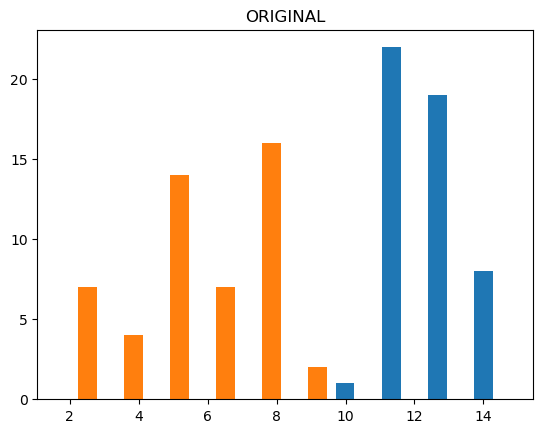

In [43]:
plt.hist(X)
plt.title("ORIGINAL")
plt.show()

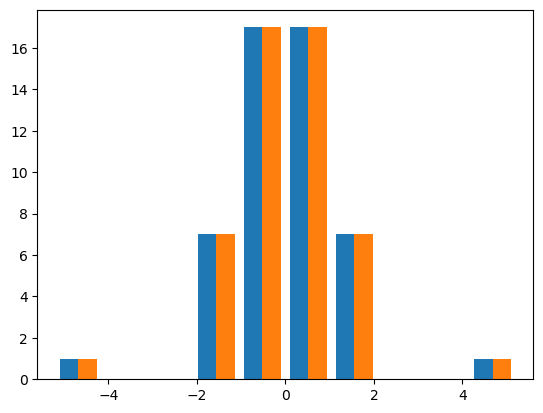

In [45]:
" QuantileTransformer로 정규분포에 가깝게 변환  "

X_trans = QuantileTransformer(output_distribution="normal", n_quantiles=50).fit_transform(X)
plt.hist(X_trans)
plt.show()

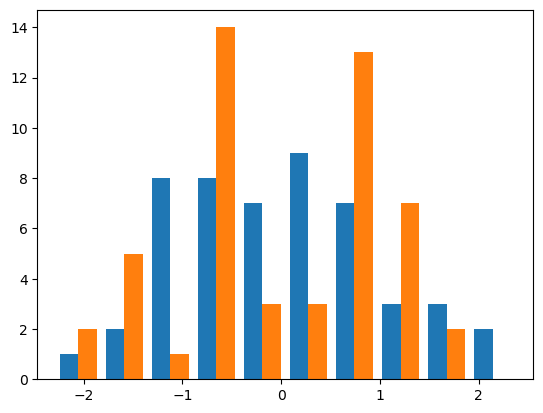

In [47]:
" StandardScaler로 표준정규분포에 가깝게 변환 "

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.show()

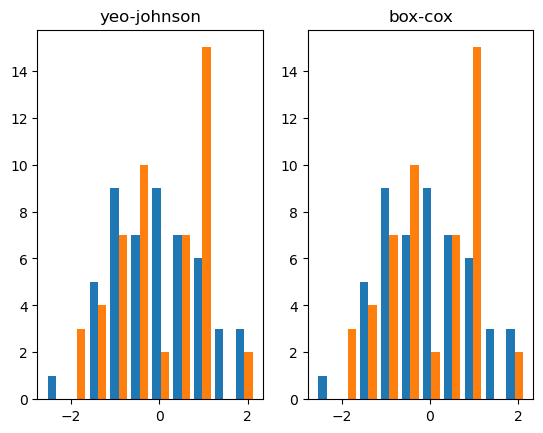

In [52]:
" PowerTransformer: yeo-johnson VS box-cox"

X_trans1 = PowerTransformer(method="yeo-johnson").fit_transform(X)
X_trans2 = PowerTransformer(method="box-cox").fit_transform(X)

fig, ax = plt.subplots(1, 2)

ax[0].hist(X_trans1)
ax[0].set_title("yeo-johnson")

ax[1].hist(X_trans2)
ax[1].set_title("box-cox")

plt.show()